# Exam R
Luuk van de Ven, u381901 & Wout van Iperen, u974489

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [146]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [147]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

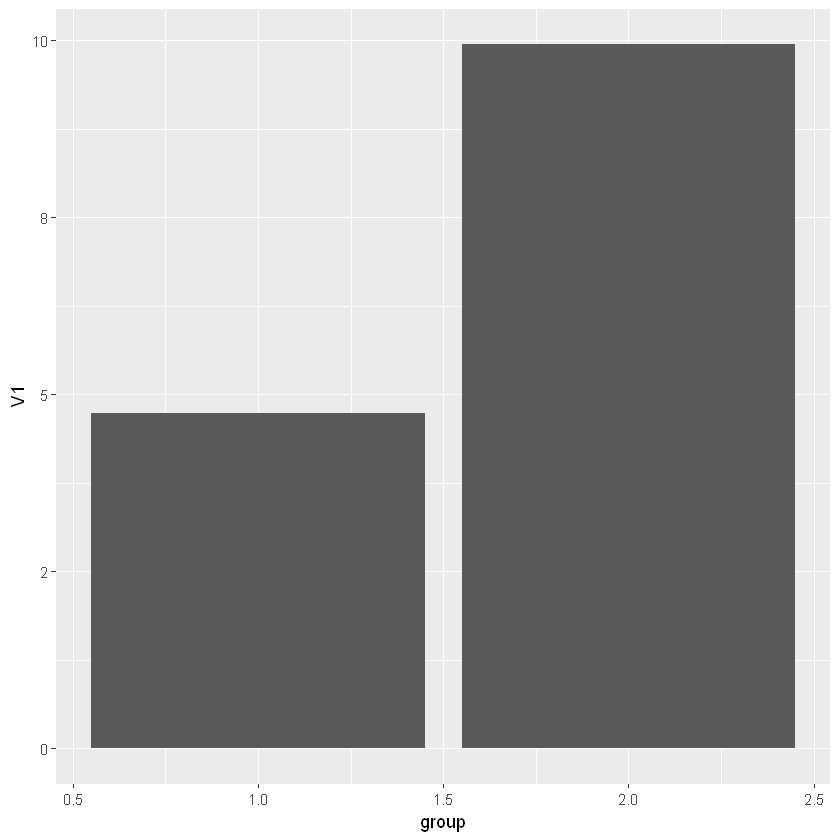

In [148]:
ggplot(df1, aes(x = group, y = V1)) + geom_bar( stat = 'identity', position = 'dodge')

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [149]:
reg1 <- lm(response ~ V1,df1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
   Min     1Q Median     3Q    Max 
-4.512 -1.116 -0.131  1.099  4.372 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.630      0.635    4.14  0.00014 ***
V1            -1.915      0.101  -18.88  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2 on 48 degrees of freedom
Multiple R-squared:  0.881,	Adjusted R-squared:  0.879 
F-statistic:  356 on 1 and 48 DF,  p-value: <2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [150]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
       2.63        -1.92  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                     Value p-value                Decision
Global Stat        0.65432   0.957 Assumptions acceptable.
Skewness           0.00240   0.961 Assumptions acceptable.
Kurtosis           0.00720   0.932 Assumptions acceptable.
Link Function      0.00585   0.939 Assumptions acceptable.
Heteroscedasticity 0.63887   0.424 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



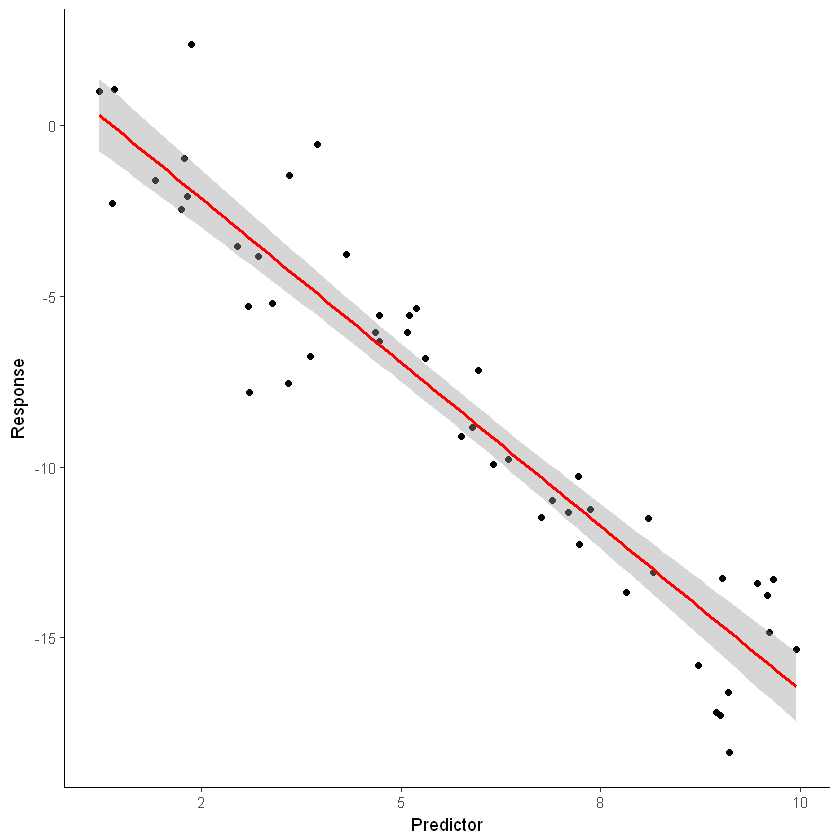

In [151]:
ggplot(df1, aes(x = V1, y = response)) + geom_point() + theme_classic() + geom_smooth(method = "lm", colour = 'red') + ylab("Response") + xlab("Predictor")

# Assigment 2

# Packages

In [152]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [153]:
map_municipal <- read.csv2("nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251.260.527.548.325,594.393.827.234.474,1,FALSE,1,0.1
Appingedam,0,251.427.775.868.901,594.486.747.111.725,2,FALSE,1,0.1
Appingedam,0,251.668.842.999.999,594646.77,3,FALSE,1,0.1
Appingedam,0,251.713.521.000.002,594.770.885.000.002,4,FALSE,1,0.1
Appingedam,0,251.354.585.000.001,595.461.381.999.999,5,FALSE,1,0.1
Appingedam,0,251.310.272,596.022.542,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

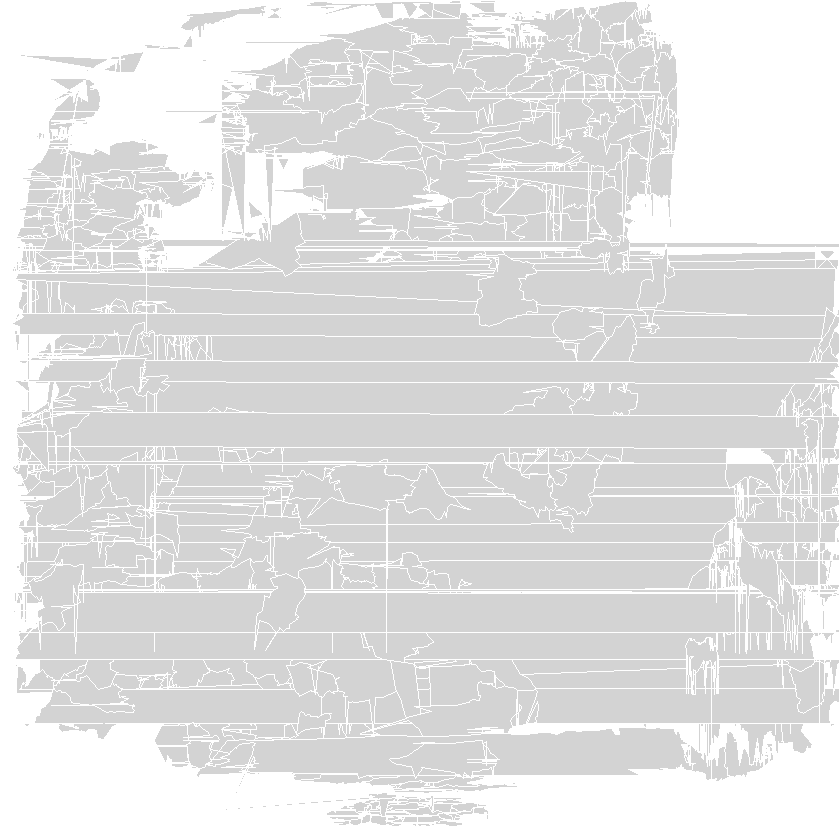

In [154]:
AddMapLayer(MapPlot(), map_municipal)


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [155]:
pc4_locations <- read.csv2("nld_pc4_locations (1).csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [156]:
schools1 <- read.csv2("schools.csv", stringsAsFactors = FALSE)
head(schools1)

PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,RPA.GEBIED.CODE,RPA.GEBIED.NAAM,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM
,41152,23HC,23HC04,RSG Lingecollege,,,,,NA,...,NA,,NA,,NA,,NA,,NA,
Drenthe,10053,18BR,18BR00,School voor Praktijkonderwijs Assen,Zwartwatersweg,202,9406 NN,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,10053,18BR,18BR01,School voor Praktijkonderwijs Assen,Bosrand,2,9401 SL,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO00,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Mr Groen v Prinstererln,98,9402 KG,ASSEN,106,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO01,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Schoolstraat,1,9331 AV,NORG,1699,...,3,Centraal-Groningen,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,1,Groningen en omstreken,7,Noord- en Midden Drenthe
Drenthe,13273,20LO,20LO02,Openbare Scholengemeenschap Dr Nassau College voor Vwo Havo Mavo Vbo Lwoo,Esdoornlaan,2,9411 AV,BEILEN,1731,...,5,Zuid- en Midden-Drenthe,7,Noord- en Midden-Drenthe,7,Noord-Drenthe,4,Assen-Hoogeveen-Emmen,7,Noord- en Midden Drenthe


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [159]:
schools1 <- schools1 %>%
    mutate(PC4 = substr(POSTCODE, 1,4)) %>%
    select(PC4, DENOMINATIE) %>%
    mutate(PC4 = as.integer(PC4))

head(schools1)
str(schools1)

PC4,DENOMINATIE
NA,Openbaar
9406,Openbaar
9401,Openbaar
9402,Openbaar
9331,Openbaar
9411,Openbaar


'data.frame':	1603 obs. of  2 variables:
 $ PC4        : int  NA 9406 9401 9402 9331 9411 9461 9402 9402 9403 ...
 $ DENOMINATIE: chr  "Openbaar" "Openbaar" "Openbaar" "Openbaar" ...


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [160]:
school_loc <- inner_join(pc4_locations, schools1, by = 'PC4') %>%
    filter(DENOMINATIE == 'Rooms-Katholiek' | DENOMINATIE == 'Protestants-Christelijk')
head(school_loc)

PC4,X,Y,DENOMINATIE
1065,1e+05,5e+05,Protestants-Christelijk
1071,1e+05,5e+05,Rooms-Katholiek
1077,1e+05,5e+05,Rooms-Katholiek
1077,1e+05,5e+05,Protestants-Christelijk
1081,1e+05,5e+05,Protestants-Christelijk
1132,1e+05,5e+05,Rooms-Katholiek


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


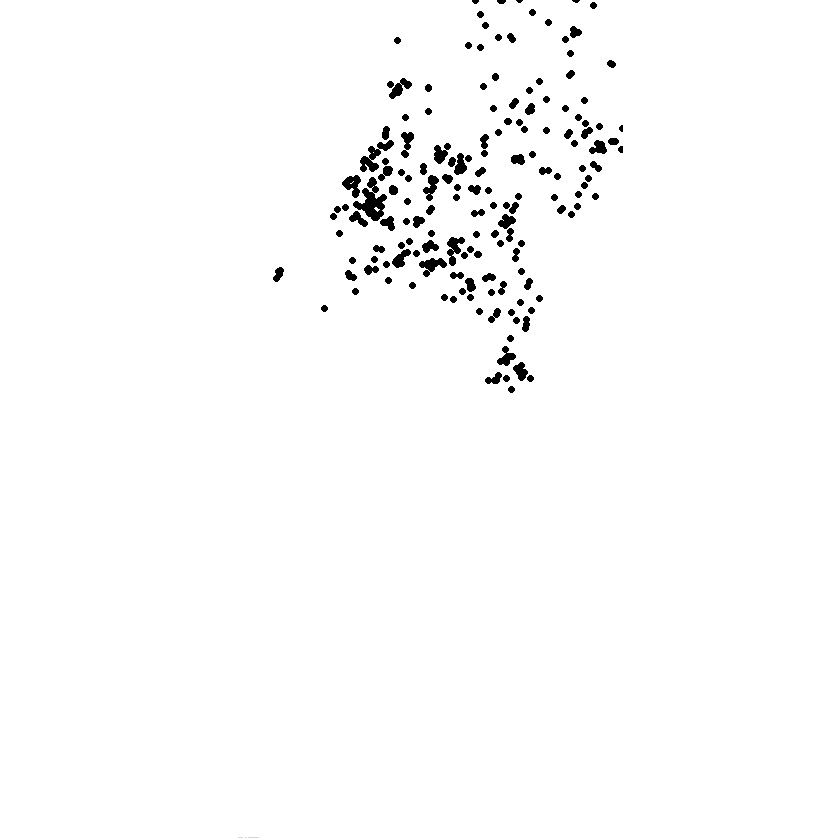

In [161]:
AddMapLayer(MapPlot(), map_municipal) %>%
    AddPointsLayer(school_loc)

End of notebook